In [44]:
#importing the matrix library
import numpy as np
#importing dataframe library
import pandas as pd
#visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
#For scaling the dataset
from sklearn.preprocessing import StandardScaler
#train_test_split
from sklearn.model_selection import train_test_split
#classification model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Loading the Dataset

In [33]:
df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test_df=pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Getting the Preliminary Information about the dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Creating the Correlation Matrix

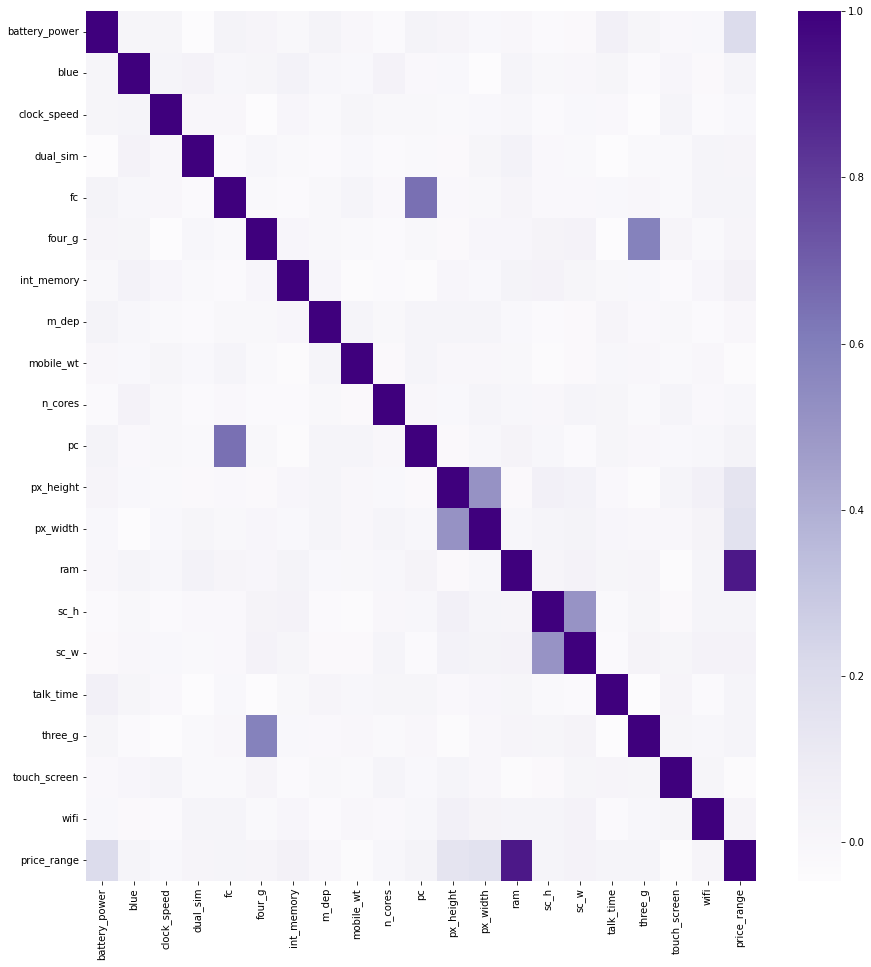

In [35]:
corr=df.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr,cmap='Purples',linecolor='black')
plt.show()

# Creating boxplot with respect to battery power and price range

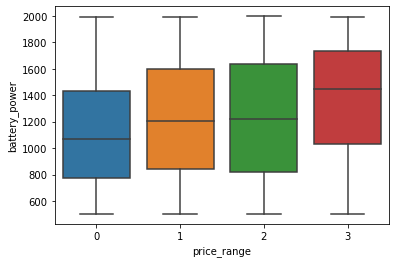

In [36]:
sns.boxplot(data=df,x='price_range',y='battery_power')
plt.show()

# Creating histogram with respect to primary and second camera pixel

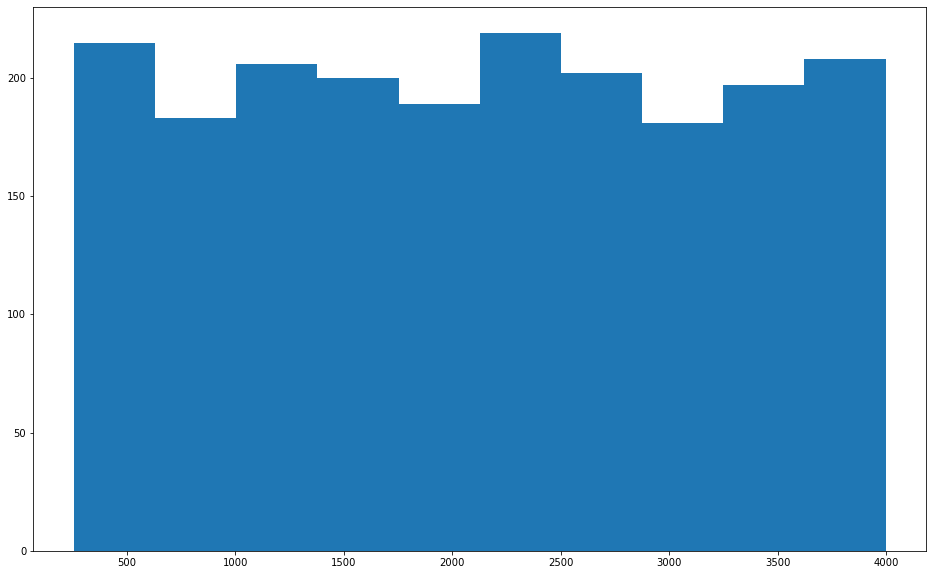

In [37]:
plt.figure(figsize=(16,10))
plt.hist(data=df,x='ram',label='Ram Distribution',log=False)
plt.show()

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs

# Creating Price Chart for Price Range

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)

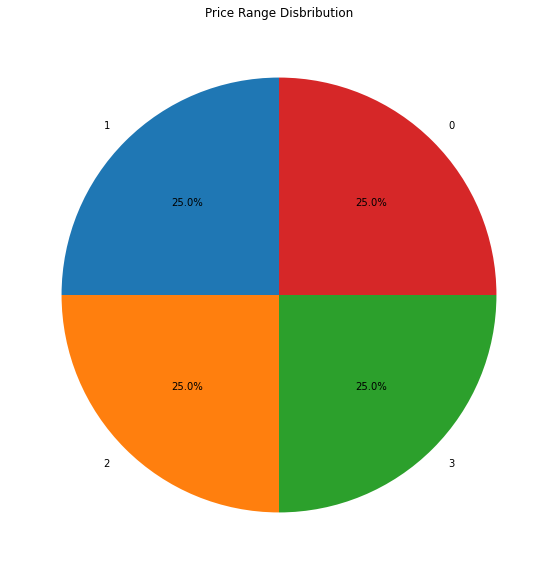

In [38]:
labels=df['price_range'].value_counts().index
size=df['price_range'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(x=size,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Price Range Disbribution')
plt.show()

# Splitting the Dataset

In [39]:
y=df['price_range']
x=df.drop('price_range',axis=1)

In [40]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


# Creating the Pipeline

In [41]:
pipe=Pipeline([('scaler',StandardScaler()),('logistic regression',LogisticRegression())])

In [42]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic regression', LogisticRegression())])

In [43]:
pipe.score(x_test,y_test)

0.935

In [46]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8716666666666667